In [9]:
import random
import time
import graphviz
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

C:\Users\12291\AppData\Local\Temp\ipykernel_24180\917319400.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
class Node:
    def __init__(self, key=None, next=None):
        self.key = key
        self.next = next


class BinaryTree:
    def __init__(self):
        self._head = Node()
        self._tail = self._head
        self._size = 0

    def push(self, key):
        node = Node(key)
        self._tail.next = node
        self._tail = self._tail.next
        self._size += 1
        return self._size - 1, node

    def pop(self):
        if self._size == 0:
            return None
        cur = self.get_nth(self._size - 2)
        self._tail = cur
        self._tail.next = None
        self._size -= 1

    def get_nth(self, i):
        cur = self._head
        for _ in range(i + 1):
            cur = cur.next
        return cur

    def parent(self, i):
        parent_idx = (i - 1) // 2
        if parent_idx < 0:
            return -1, None
        return parent_idx, self.get_nth(parent_idx)

    def left_child(self, i):
        left_child_idx = i * 2 + 1
        if left_child_idx >= self._size:
            return -1, None
        return left_child_idx, self.get_nth(left_child_idx)

    def right_child(self, i):
        right_child_idx = i * 2 + 2
        if right_child_idx >= self._size:
            return -1, None
        return right_child_idx, self.get_nth(right_child_idx)

    def size(self):
        return self._size

In [3]:
class MinPriorityQueue:
    def __init__(self):
        self.tree = BinaryTree()

    def insert(self, key):
        cur_idx, cur_node = self.tree.push(key)
        parent_idx, parent_node = self.tree.parent(cur_idx)
        while parent_idx != -1:
            if parent_node.key > cur_node.key:
                parent_node.key, cur_node.key = cur_node.key, parent_node.key
                cur_idx, cur_node = parent_idx, parent_node
                parent_idx, parent_node = self.tree.parent(cur_idx)
            else:
                break

    def delMin(self):
        if self.tree.size() == 0:
            return None

        min_key = self.tree.get_nth(0).key
        self.tree.get_nth(0).key = self.tree.get_nth(self.tree.size() - 1).key
        self.tree.pop()
        cur_idx, cur_node = 0, self.tree.get_nth(0)
        while True:
            left_child_idx, left_child_node = self.tree.left_child(cur_idx)
            right_child_idx, right_child_node = self.tree.right_child(cur_idx)
            if left_child_idx == -1 and right_child_idx == -1:
                break

            target_idx, target_node = left_child_idx, left_child_node
            if right_child_idx != -1 and right_child_node.key < target_node.key:
                target_idx, target_node = right_child_idx, right_child_node

            if cur_node.key > target_node.key:
                cur_node.key, target_node.key = target_node.key, cur_node.key
                cur_idx, cur_node = target_idx, target_node
            else:
                break

        return min_key

    def render(self, filename):
        dot = graphviz.Digraph(filename)
        dot.format = 'png'
        for idx in range(self.tree.size()):
            dot.node(str(idx), str(self.tree.get_nth(idx).key))
        for idx in range(self.tree.size()):
            left_child_idx, _ = self.tree.left_child(idx)
            right_child_idx, _ = self.tree.right_child(idx)
            if left_child_idx != -1:
                dot.edge(str(idx), str(left_child_idx))
            if right_child_idx != -1:
                dot.edge(str(idx), str(right_child_idx))
        dot.render(directory='.')

In [10]:
insert_time = []
delMin_time = []
for n in [100, 1000, 10000]:
    pq = MinPriorityQueue()
    keys = list(range(n))
    random.shuffle(keys)
    t0 = time.time()

    for i in keys:
        pq.insert(i)

    t1 = time.time()

    values = []
    
    for _ in range(n):
        v = pq.delMin()
        values.append(v)

    t2 = time.time()
    assert values == list(range(n))

    insert_time.append(t1 - t0)
    delMin_time.append(t2 - t1)

    print("n = {}, insert time = {}, delMin time = {}".format(n, t1 - t0, t2 - t1))

pq1 = MinPriorityQueue()
keys = list(range(20))
random.shuffle(keys)
for i in keys:
    pq1.insert(i)
pq1.render("result")

n = 100, insert time = 0.0, delMin time = 0.0009999275207519531
n = 1000, insert time = 0.007006406784057617, delMin time = 0.05099058151245117
n = 10000, insert time = 0.7227680683135986, delMin time = 4.8962297439575195


Text(0.5, 1.0, 'Insert time')

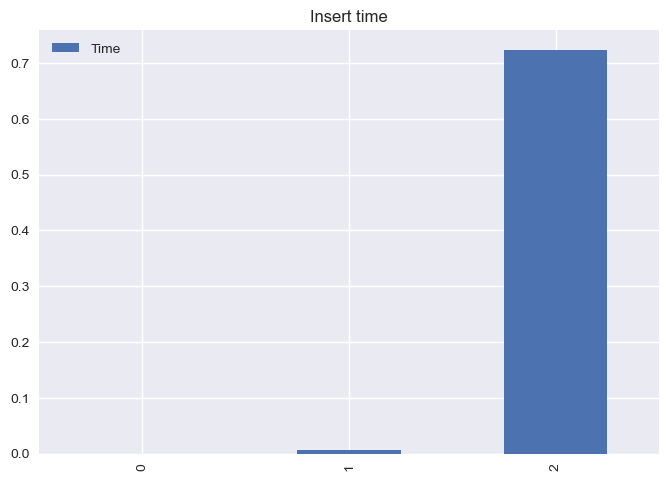

In [11]:
time = pd.DataFrame({"Time" : insert_time})
time.plot.bar().set_title('Insert time')

Text(0.5, 1.0, 'delMin time')

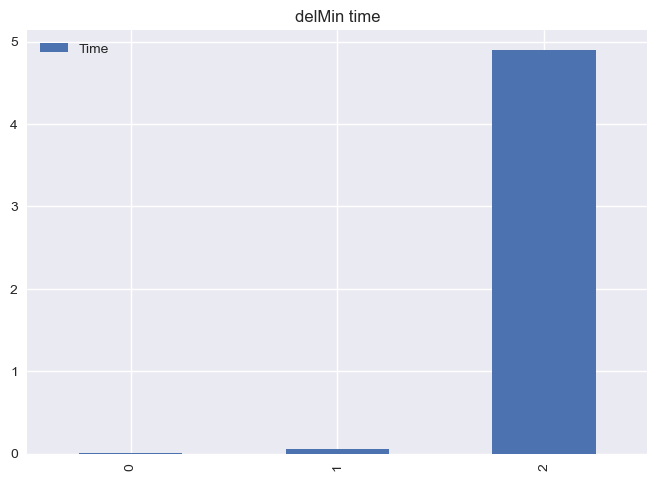

In [12]:
time = pd.DataFrame({"Time" : delMin_time})
time.plot.bar().set_title('delMin time')